<a href="https://colab.research.google.com/github/sakathia/DATA201/blob/main/DATA201_Project_3_Sandra_Aching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 3: Red Wine Quality in Portugal

##Introduction:
This dataset contains quality ratings for red variants of the Portuguese "Vinho Verde" wine, with data drawn from [Cortez et al., 2009]. It includes only physicochemical attributes (such as acidity, alcohol content, and sugar levels) and sensory quality scores. We selected this dataset because we were interested in exploring patterns in red wine quality and how it may be influenced by different chemical properties.

##Data Source:
https://archive.ics.uci.edu/dataset/186/wine+quality


https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c

In [ ]:
#importing the needed libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE



In [ ]:
#Loading and reading the dataset
orig_data = "/content/winequality-red.csv"
red_wine = pd.read_csv(orig_data, sep= ";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Removing NAs
red_wine = red_wine.dropna()

In [ ]:
red_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.shape

(1599, 12)

<Axes: xlabel='citric acid', ylabel='pH'>

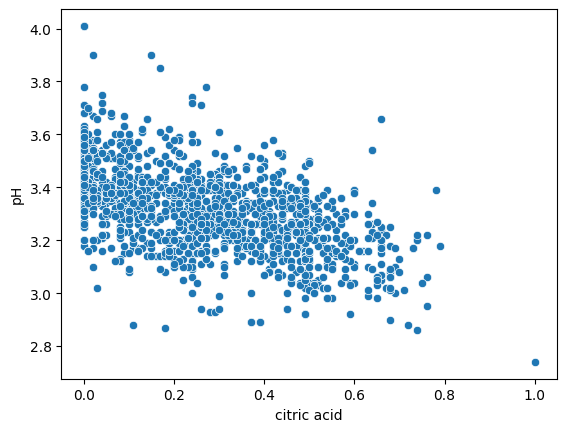

In [ ]:
sns.scatterplot(x="citric acid", y="pH", data=red_wine)

<Axes: xlabel='residual sugar', ylabel='density'>

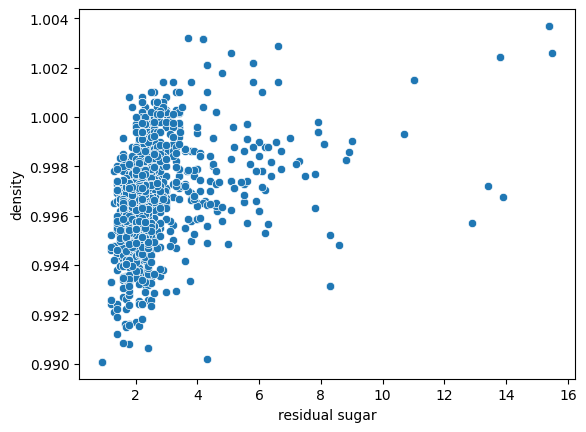

In [ ]:
sns.scatterplot(x="residual sugar", y="density", data=red_wine)

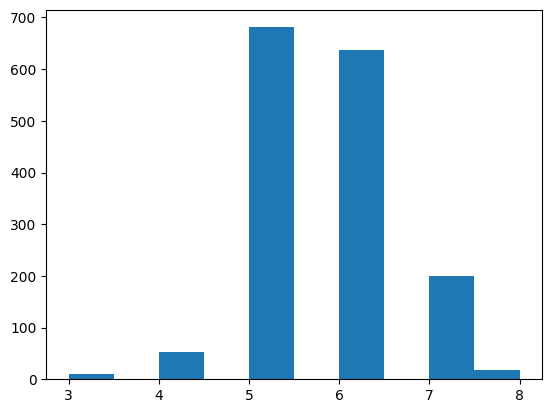

In [ ]:
plt.hist(red_wine["quality"])
plt.show()

###  Regression
The target is a continuous variable (e.g., price of a house)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

redwine_quality= red_wine[['citric acid',	'residual sugar', 'density',	'pH', 'alcohol']]

X = redwine_quality.values
y = red_wine["quality"].values


In [ ]:
X.shape

(1599, 5)

In [ ]:
y.shape

(1599,)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=99)

reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=99)
DecisionTreeRegressor()

DecisionTreeRegressor()

In [ ]:
RMSE_CV = - cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv= 10)
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)

In [ ]:
#  RMSE for CV
print('CV RMSE: {:.2f}'.format(RMSE_CV.mean()))


# Test RMSE
print('Test RMSE: {:.2f}'.format(np.sqrt(MSE(y_test, y_pred_test))))


CV RMSE: 0.71
Test RMSE: 0.72


In [ ]:

redwine_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:squarederror","max_depth":4, "alpha":1}
cv_results = xgb.cv(dtrain=redwine_dmatrix, params=params,nfold=4,num_boost_round=10,metrics="rmse",as_pandas=True,seed=99)
cv_results["test-rmse-mean"].tail(1).values[0]


np.float64(0.6849953169316471)

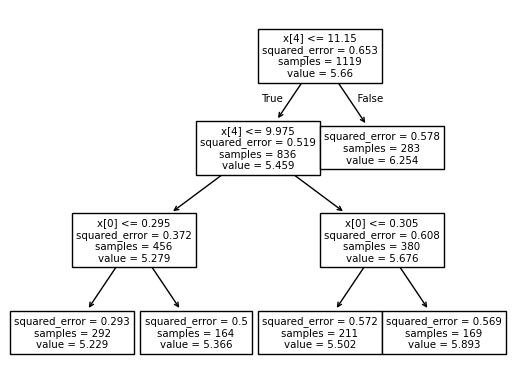

In [ ]:
plot_tree(reg)
plt.show()